# 4.9 Intro to Data Visualization with Python

In [10]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [12]:
# Change the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

In [14]:
# Reset the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [16]:
# Importing project data

path = r'C:\Users\IVON6\Instacart Basket Analysis'
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_grouped.pkl'))

In [18]:
# Checking the data

ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.80,3139998,138,28,6,11,3.00,False,5,0,both,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.80,1977647,138,30,6,17,20.00,False,1,1,both,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.94,Low spender,8.00,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.80,389851,709,2,0,21,6.00,False,20,0,both,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.93,Low spender,8.00,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.80,652770,764,1,3,13,NaN,True,10,0,both,Mid-range product,Slowest day,Slowest days,Most orders,3,New customer,4.97,Low spender,9.00,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.80,1813452,764,3,4,17,9.00,False,11,1,both,Mid-range product,Slowest day,Slowest days,Average orders,3,New customer,4.97,Low spender,9.00,Frequent customer


## Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

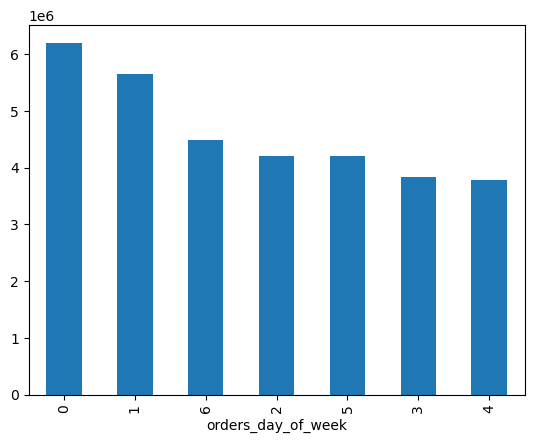

In [21]:
# Creating a bar chart for orders_days_of_week

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_week'>

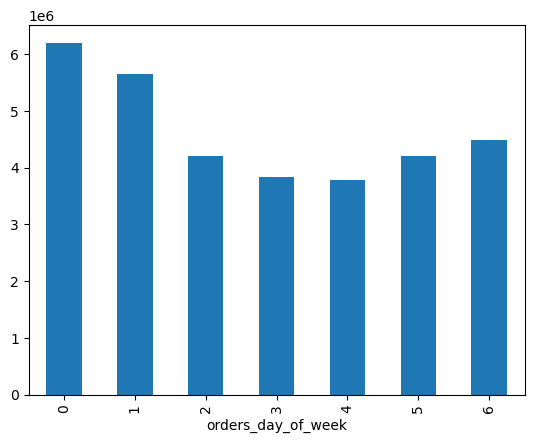

In [25]:
# Sorting the values into logical order: The sort_index() function will sort the bars in your chart according to their index order
# (rather than largest to smallest).

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [27]:
# Printing frequences (from max to min)

ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [31]:
# Printing frequences as indexed order 

ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

<Axes: xlabel='orders_day_of_week'>

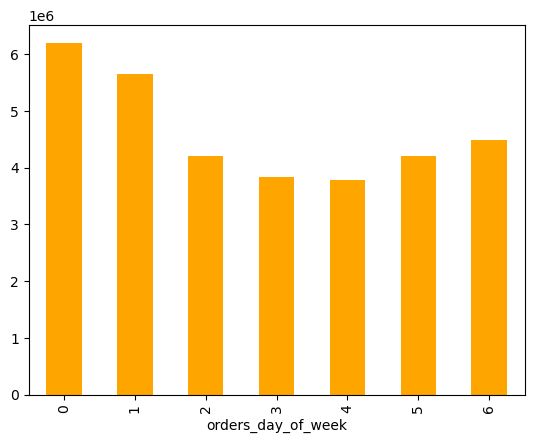

In [35]:
# Adding colors

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['orange'])

<Axes: xlabel='orders_day_of_week'>

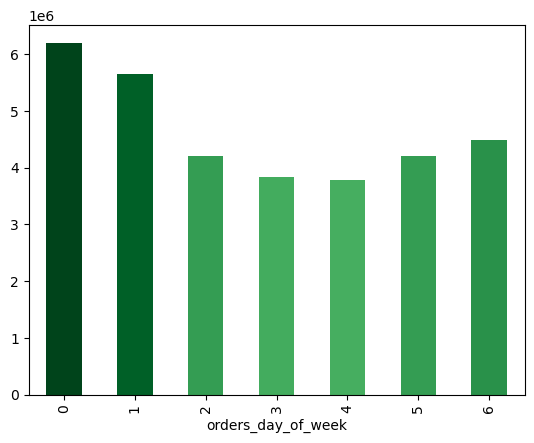

In [45]:
# Changing colors based on the count numbers

counts = ords_prods_merge['orders_day_of_week'].value_counts().sort_index()
colors = plt.cm.Greens(counts / counts.max())  # Using the 'Green' colormap and scaling counts to range [0, 1]

counts.plot.bar(color=colors)

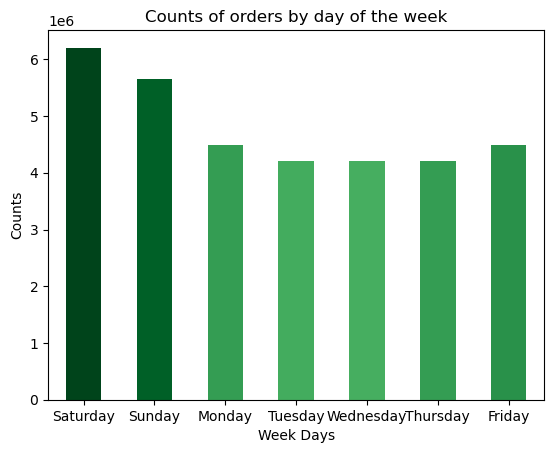

In [49]:
# Making a final chart for export

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =colors)

colors = plt.cm.Greens(counts / counts.max())  # Using the 'Green' colormap and scaling counts to range [0, 1]

# Plotting the bar chart
ax = counts.plot.bar(color=colors)

# Adding title and labels to the plot
ax.set_title("Counts of orders by day of the week")
ax.set_xlabel("Week Days")
ax.set_ylabel("Counts")

# Changing the tick labels for the x-axis
day_labels = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
ax.set_xticklabels(day_labels, rotation=0)

# Showing the plot
plt.show()

In [51]:
bar.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

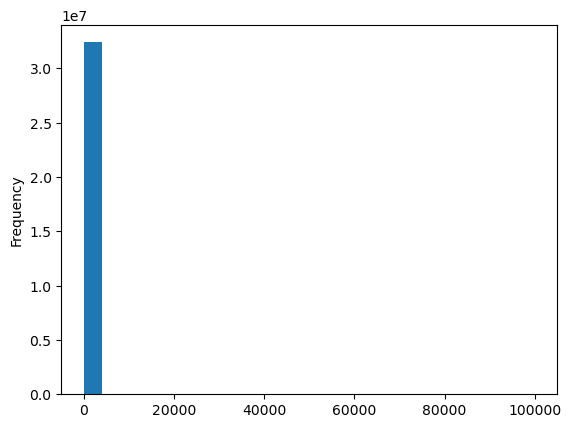

In [54]:
# Creating a histogramm of the 'prices' column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [56]:
# Inspect the variable 'prices'

ords_prods_merge['prices'].describe()

count   32404859.00
mean          11.98
std          495.66
min            1.00
25%            4.20
50%            7.40
75%           11.30
max        99999.00
Name: prices, dtype: float64

In [60]:
# Calculating the average value

ords_prods_merge['prices'].mean()
# Or '{:.2f}'.format(ords_prods_merge['prices'].mean()) --> to show only 11.98

11.980225638383468

In [62]:
# Calculating the median

ords_prods_merge['prices'].median()

7.4

In [64]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

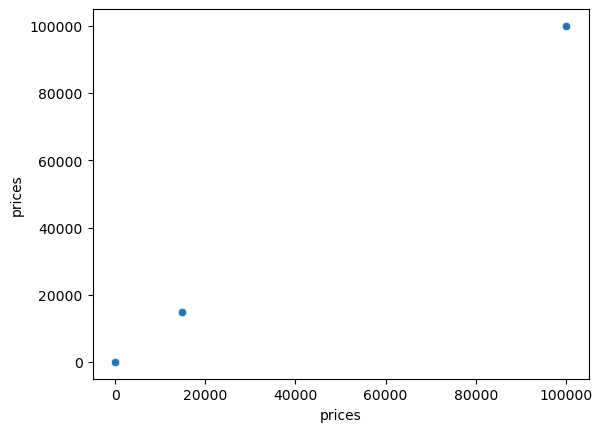

In [66]:
# Plotting the “prices” column against itself

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [68]:
# Check the ouliers where the price is above 100$

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days_since_prior_order,frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,912404,17,12,2,14,5.00,False,5,0,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.65,High spender,5.00,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,603376,17,22,6,16,4.00,False,3,1,both,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.65,High spender,5.00,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,3264360,135,2,2,21,13.00,False,6,0,both,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.79,High spender,12.00,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,892534,135,3,0,8,12.00,False,3,1,both,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.79,High spender,12.00,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.00,229704,342,8,1,19,30.00,False,9,0,both,High-range product,Busiest day,Busiest days,Average orders,16,Regular customer,114.43,High spender,23.00,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.00,2249946,204099,29,0,8,4.00,False,1,0,both,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.74,High spender,4.00,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.00,2363282,204099,31,0,9,2.00,False,1,1,both,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.74,High spender,4.00,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.00,3181945,204395,13,3,15,8.00,False,25,0,both,High-range product,Slowest day,Slowest days,Most orders,15,Regular customer,451.15,High spender,5.00,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.00,2486215,205227,7,3,20,4.00,False,8,0,both,High-range product,Slowest day,Slowest days,Average orders,12,Regular customer,1178.38,High spender,12.00,Regular customer


In [70]:
# Turning the unexpected values to NaN

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [72]:
# Checking the max value after excluding outliers

ords_prods_merge['prices'].max()

25.0

<Axes: ylabel='Frequency'>

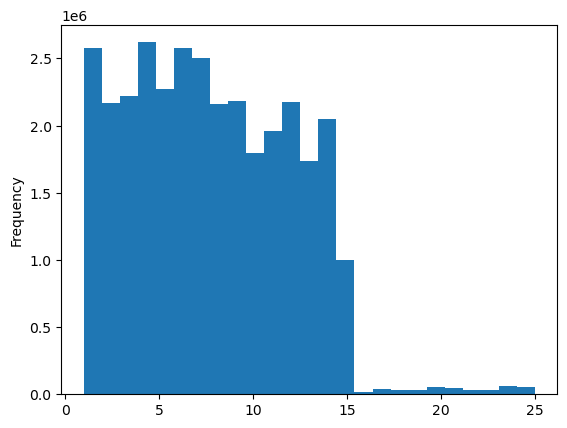

In [74]:
# New histogramm after excluding outliers

ords_prods_merge['prices'].plot.hist(bins = 25)

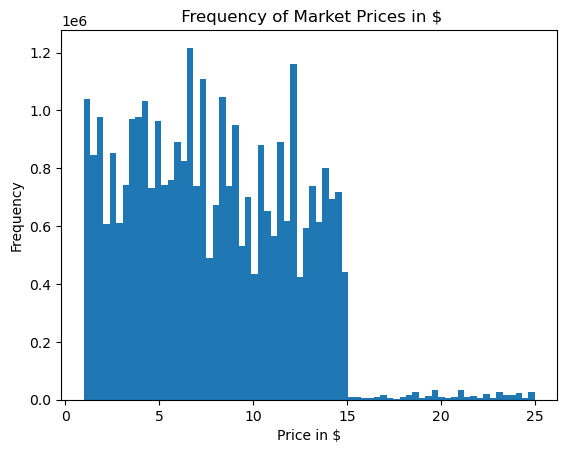

In [76]:
# Exploring a more detailled histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 70)

# Adding title and labels to the histogram

plt.title(" Frequency of Market Prices in $")
plt.xlabel("Price in $")
plt.ylabel("Frequency")

# Show the histogram
plt.show()

In [78]:
# Exporting a histogramm

hist.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'histogram_prices.png'))

## Creating Line Charts

In [81]:
# plot the “orders_day_of_week” column on the x-axis and the “prices” column on the y-axis

In [83]:
# Machine Learning example: Training a model - 80 % of a data set to train the algorithm
# Remaining 20 percent to check the accuracy of the model
# Creating these samples requires a list of random floating numbers between 0 and 1 (1 --> 100%) => 0.7 --> to split 70/30

In [85]:
# Creating a random seeed

np.random.seed(4)

# Creating a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [87]:
# Checking the boolean values

dev

array([False,  True, False, ...,  True,  True,  True])

In [95]:
# Split the dataframe into two samples

big = ords_prods_merge[dev] # store 70% of the sample in the df big
small = ords_prods_merge[~dev] # store 30% of the sample in the df small

In [97]:
# Calculating the lenght of the whole df

len(ords_prods_merge)

32404859

In [99]:
# Comparing the results of the lenght of the whole dataframe with sum of both subsets

len(big)+len(small)

32404859

In [101]:
# Reducing the number of columns to the number that is necessary

df_2 = small[['orders_day_of_week','prices']]

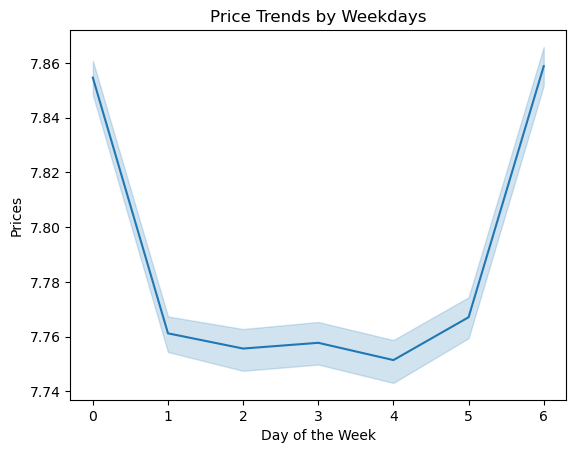

In [103]:
# Creating a line chart 

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Adding title and labels to the line chart

plt.title("Price Trends by Weekdays")
plt.xlabel("Day of the Week")
plt.ylabel("Prices")

# Show the histogram
plt.show()

In [105]:
# Exporting a Line chart

line.figure.savefig(os.path.join(path, '02 Data','Visualizations', 'lineChart_price_by_day.png'))